In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('Credit Card Defaulter Prediction.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [33]:
cs = data.copy()

In [34]:
cs.drop('ID', axis = 1, inplace = True)
cs.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Y
1,120000,F,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,90000,F,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,50000,F,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,50000,M,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [50]:
frame = cs.rename(columns={'default': 'Total'})
frame.head(\)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,4,1,24,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,689,-0.296801,-0.308063,-0.314136,-0.293382,1
1,120000,0,4,3,26,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,1000,-0.240005,-0.244230,-0.314136,-0.180878,1


In [35]:
cs.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [36]:
num = cs.select_dtypes(include = 'number')
cat = cs.select_dtypes(exclude = 'number')

print(f'Numerical Columns')
display(num.head())
print(f'\nCategorical Columns')
display(cat.head())

Numerical Columns


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679



Categorical Columns


,SEX,EDUCATION,MARRIAGE,default
0,F,University,Married,Y
1,F,University,Single,Y
2,F,University,Single,N
3,F,University,Married,N
4,M,University,Married,N


In [37]:
num.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [38]:
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
toBeScaled = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
scaled = {}

for i in toBeScaled:
    scaler = StandardScaler()
    cs[i] = scaler.fit_transform(cs[[i]])
    scaled[i + '_scaled'] = scaler
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb')) 

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

encoded = {}

for i in cs.select_dtypes(exclude = 'number'):   
    encoder = LabelEncoder() 
    cs[i] = encoder.fit_transform(cs[i]) 
    encoded[i + '_encoder'] = encoder 
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb')) 

encoded

{'SEX_encoder': LabelEncoder(),
 'EDUCATION_encoder': LabelEncoder(),
 'MARRIAGE_encoder': LabelEncoder(),
 'default _encoder': LabelEncoder()}

In [40]:
cs

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,4,1,24,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,689,-0.296801,-0.308063,-0.314136,-0.293382,1
1,120000,0,4,3,26,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,1000,-0.240005,-0.244230,-0.314136,-0.180878,1
2,90000,0,4,3,34,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,1500,-0.240005,-0.244230,-0.248683,-0.012122,0
3,50000,0,4,1,37,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,2019,-0.228645,-0.237846,-0.244166,-0.237130,0
4,50000,1,4,1,57,-1,0,-1,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,36681,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,2,1,39,0,0,0,0,0,...,0.695474,-0.149259,-0.384392,0.171250,20000,-0.012648,-0.113564,0.013131,-0.237130,0
29996,150000,1,2,3,43,-1,-1,-1,-1,0,...,-0.532924,-0.577691,-0.652724,-0.231032,3526,0.214255,-0.299828,-0.314136,-0.293382,0
29997,30000,1,4,3,37,4,3,2,-1,0,...,-0.347961,-0.324517,-0.327687,-0.341942,0,0.952725,-0.039964,-0.183229,-0.119001,1
29998,80000,1,2,1,41,1,-1,0,0,0,...,0.147844,-0.468063,0.169130,4.844316,3409,-0.229895,-0.185120,3.152536,-0.191904,1


In [43]:
cs

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,4,1,24,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,689,-0.296801,-0.308063,-0.314136,-0.293382,1
1,120000,0,4,3,26,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,1000,-0.240005,-0.244230,-0.314136,-0.180878,1
2,90000,0,4,3,34,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,1500,-0.240005,-0.244230,-0.248683,-0.012122,0
3,50000,0,4,1,37,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,2019,-0.228645,-0.237846,-0.244166,-0.237130,0
4,50000,1,4,1,57,-1,0,-1,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,36681,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,2,1,39,0,0,0,0,0,...,0.695474,-0.149259,-0.384392,0.171250,20000,-0.012648,-0.113564,0.013131,-0.237130,0
29996,150000,1,2,3,43,-1,-1,-1,-1,0,...,-0.532924,-0.577691,-0.652724,-0.231032,3526,0.214255,-0.299828,-0.314136,-0.293382,0
29997,30000,1,4,3,37,4,3,2,-1,0,...,-0.347961,-0.324517,-0.327687,-0.341942,0,0.952725,-0.039964,-0.183229,-0.119001,1
29998,80000,1,2,1,41,1,-1,0,0,0,...,0.147844,-0.468063,0.169130,4.844316,3409,-0.229895,-0.185120,3.152536,-0.191904,1


In [44]:
cs.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

In [51]:
cs

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,4,1,24,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,689,-0.296801,-0.308063,-0.314136,-0.293382,1
1,120000,0,4,3,26,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,1000,-0.240005,-0.244230,-0.314136,-0.180878,1
2,90000,0,4,3,34,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,1500,-0.240005,-0.244230,-0.248683,-0.012122,0
3,50000,0,4,1,37,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,2019,-0.228645,-0.237846,-0.244166,-0.237130,0
4,50000,1,4,1,57,-1,0,-1,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,36681,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,2,1,39,0,0,0,0,0,...,0.695474,-0.149259,-0.384392,0.171250,20000,-0.012648,-0.113564,0.013131,-0.237130,0
29996,150000,1,2,3,43,-1,-1,-1,-1,0,...,-0.532924,-0.577691,-0.652724,-0.231032,3526,0.214255,-0.299828,-0.314136,-0.293382,0
29997,30000,1,4,3,37,4,3,2,-1,0,...,-0.347961,-0.324517,-0.327687,-0.341942,0,0.952725,-0.039964,-0.183229,-0.119001,1
29998,80000,1,2,1,41,1,-1,0,0,0,...,0.147844,-0.468063,0.169130,4.844316,3409,-0.229895,-0.185120,3.152536,-0.191904,1


In [54]:
cs.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

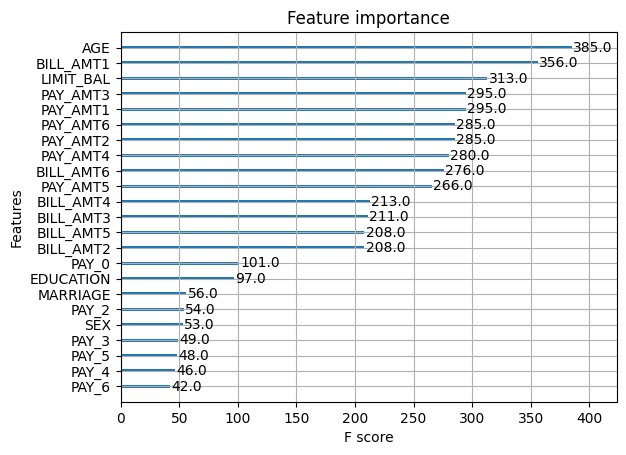

In [56]:
import matplotlib.pyplot as plt
import xgboost as xgb
model = xgb.XGBClassifier()

x = cs.drop('default ', axis = 1)
y = cs['default '] 

model.fit(x, y)

xgb.plot_importance(model, importance_type = 'weight')

In [57]:
sel_cols = ['AGE', 'BILL_AMT1', 'PAY_AMT6', 'BILL_AMT6',
            'BILL_AMT5', 'PAY_AMT1', 'BILL_AMT2', 'PAY_AMT4', 'default ']
cs = cs[sel_cols]
cs.head()

,AGE,BILL_AMT1,PAY_AMT6,BILL_AMT6,BILL_AMT5,PAY_AMT1,BILL_AMT2,PAY_AMT4,default
0,24,-0.642501,-0.293382,-0.652724,-0.663059,-0.341942,-0.647399,-0.308063,1
1,26,-0.659219,-0.180878,-0.597966,-0.606229,-0.341942,-0.666747,-0.244230,1
2,34,-0.298560,-0.012122,-0.391630,-0.417188,-0.250292,-0.493899,-0.244230,0
3,37,-0.057491,-0.237130,-0.156579,-0.186729,-0.221191,-0.013293,-0.237846,0
4,57,-0.578618,-0.255187,-0.331482,-0.348137,-0.221191,-0.611318,0.266434,0


In [58]:
x = cs.drop('default ', axis = 1)
y = cs['default '] 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 45)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(xtrain, ytrain)

cross_validation = log_reg.predict(xtrain) 
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     23994
           1       0.00      0.17      0.00         6

    accuracy                           0.78     24000
   macro avg       0.50      0.47      0.44     24000
weighted avg       1.00      0.78      0.88     24000



,AGE,BILL_AMT1,PAY_AMT6,BILL_AMT6,BILL_AMT5,PAY_AMT1,BILL_AMT2,PAY_AMT4,default
12911,39,-0.690345,-0.271444,-0.646175,-0.610934,-0.318395,-0.685504,-0.105776,0
21880,22,-0.693279,-0.193366,-0.652724,-0.565026,-0.221492,-0.662953,0.072382,0
14600,38,-0.290900,-0.293382,-0.140912,-0.177386,-0.237250,-0.258710,-0.242059,0
15038,33,-0.581484,-0.209004,-0.596757,-0.559532,-0.160815,-0.572708,-0.244230,0
29549,33,0.105829,-0.288432,-0.286379,-0.255829,-0.341942,-0.461190,0.521765,0


[Text(0, 0, '23364'), Text(0, 0, '200')]

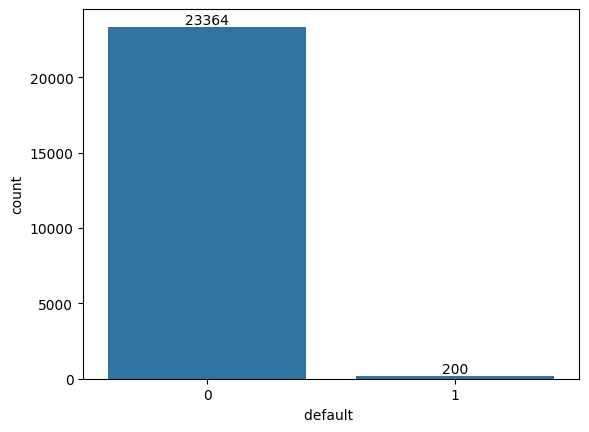

In [60]:
class_1 = cs.loc[cs['default '] == 1]
class_0 = cs.loc[cs['default '] == 0]

new_class_1 = class_1.sample(200)

new_data = pd.concat([new_class_1, class_0], axis = 0)
display(new_data.sample(5))

fig = sns.countplot(x = new_data['default '])
fig.bar_label(fig.containers[0])

In [62]:
x = new_data.drop(['default '], axis = 1)
y = new_data['default ']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 23)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rand_model = RandomForestClassifier()

rand_model.fit(xtrain, ytrain)

cross_validation = rand_model.predict(xtrain) 
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18702
           1       0.93      1.00      0.96       149

    accuracy                           1.00     18851
   macro avg       0.97      1.00      0.98     18851
weighted avg       1.00      1.00      1.00     18851



[Text(0, 0, '18691'), Text(0, 0, '18691')]

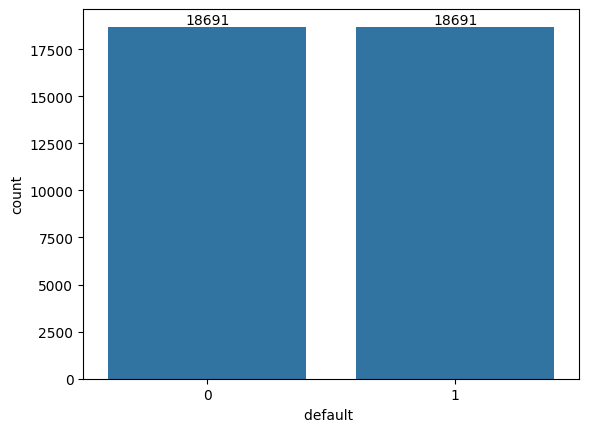

In [63]:
from imblearn.over_sampling import SMOTE

x = cs.drop(['default '], axis = 1)
y = cs['default ']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 40)

smote = SMOTE(sampling_strategy= 'auto', random_state=5)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

fig = sns.countplot(x = y_resampled)
fig.bar_label(fig.containers[0])

In [65]:
rand_model = RandomForestClassifier()

rand_model.fit(X_resampled, y_resampled)

cross_validation = rand_model.predict(X_resampled) 
print(classification_report(cross_validation, y_resampled))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18400
           1       1.00      0.98      0.99     18982

    accuracy                           0.99     37382
   macro avg       0.99      0.99      0.99     37382
weighted avg       0.99      0.99      0.99     37382



              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4543
           1       0.39      0.36      0.38      1457

    accuracy                           0.71      6000
   macro avg       0.60      0.59      0.59      6000
weighted avg       0.70      0.71      0.71      6000



<Axes: >

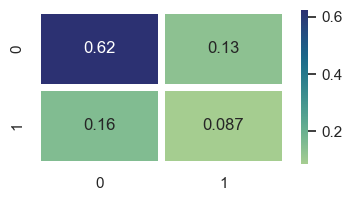

In [66]:
pred = rand_model.predict(xtest) 
print(classification_report(pred, ytest))


import numpy as np
revealer = confusion_matrix(pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [67]:
joblib.dump(log_reg, open('CreditCard.pkl', 'wb'))